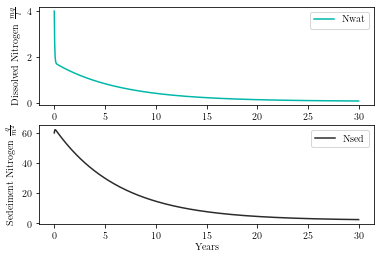

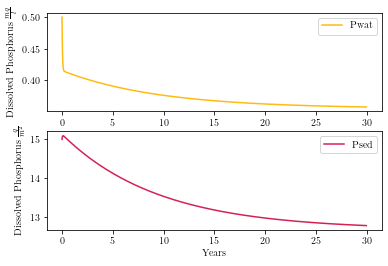

Nwat for Years: 0.837520, 0.418070, 0.140422, 0.085513
Nsed for Years: 30.014002, 14.766070, 4.672975, 2.676917
Pwat for Years: 0.391148, 0.376588, 0.362900, 0.358404
Psed for Years: 14.126449, 13.529270, 12.967868, 12.783508


In [27]:
#This program was created to create a 0-dimensional model:
#The  LAKE  model  performs  a  mass balance  of  phosphorus  and  nitrogen  in  a  lake, assuming  
#that  the  lake  can  be  schematized  as  a  group  of  sub-compartments.  The  sub-compartments are the water column and the bed sediment.

#This code was created by G. Aaron Alexander

#Date Last modified 14 Feb 2017

###########################################################################
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc

#First define all constants
Nload = 25 #g/m^2*year
Nrel = .9 #1/year
Nbound = .1
z = 1.8 #m
SedRate = 30 #m/year
Wres = .6	#years

Prel = .8 #1/year
Pbound = .05
Pload = 1.6
a = 1
Denit = Nload-0.34*(Wres**(-0.16))*(z**0.17) #This is the dentrification process


#Set time step:
step = .02

#we are asked to increment by .02 years for 20 years, meaning we need a numpy array of 1000 values to work through
years = 30
npCount = int(years/step)
Nwat = np.zeros(npCount) #mg/l
Nsed = np.zeros(npCount) #g/m^2
Pwat = np.zeros(npCount) #mg/l
Psed = np.zeros(npCount) #g/m^2

#Define Initial conditions
Nwat[0] = 4
Nsed[0] = 60
Pwat[0] = 0.5
Psed[0] = 15

T = np.arange(0,years,step)

#Finally find the solution with the data specified above
for t in range(1,(npCount)):
	Nwat[t] = Nwat[t-1] + step*((Nrel/z)*Nsed[t-1] - (a/Wres)*Nwat[t-1] - (SedRate/z)*Nwat[t-1]+ (Nload- Denit)/z )
	Nsed[t] = Nsed[t-1] + step*(SedRate*(1-Nbound)*Nwat[t-1] - Nrel*Nsed[t-1])

	Pwat[t] = Pwat[t-1] + step*((Prel/z)*Psed[t-1] - (a/Wres)*Pwat[t-1] - (SedRate/z)*Pwat[t-1] + Pload/z)
	Psed[t] = Psed[t-1] + step*(SedRate*(1-Pbound)*Pwat[t-1] - Prel*Psed[t-1])
    
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(1)

plt.subplot(211)
plt.plot(T, Nwat, color = '#00B8A9', label = 'Nwat')
plt.ylabel(r"Dissolved Nitrogen $\frac{mg}{l}$")
plt.legend()

plt.subplot(212)
plt.plot(T, Nsed, color = '#2A2B2B', label = 'Nsed')
plt.ylabel(r"Sedeiment Nitrogen $\frac{g}{m^2}$")
plt.legend()
plt.xlabel('Years')

plt.show()

plt.figure(2)
plt.subplot(211)
plt.plot(T,Pwat, color = '#FFBB11', label = 'Pwat')
plt.ylabel(r"Dissolved Phosphorus $\frac{mg}{l}$")
plt.legend()

plt.subplot(212)
plt.plot(T,Psed, color = '#D52054', label = 'Psed')
plt.ylabel(r"Dissolved Phosphorus $\frac{g}{m^2}$")
plt.xlabel('Years')
plt.legend()

plt.show()

print('Nwat for Years: %f, %f, %f, %f' %(Nwat[249], Nwat[499], Nwat[999], Nwat[1449]))
print('Nsed for Years: %f, %f, %f, %f' %(Nsed[249], Nsed[499], Nsed[999], Nsed[1449]))

print('Pwat for Years: %f, %f, %f, %f' %(Pwat[249], Pwat[499], Pwat[999], Pwat[1449]))
print('Psed for Years: %f, %f, %f, %f' %(Psed[249], Psed[499], Psed[999], Psed[1449]))



# Problem 2: Instability testing

## Using delta t = 0.04

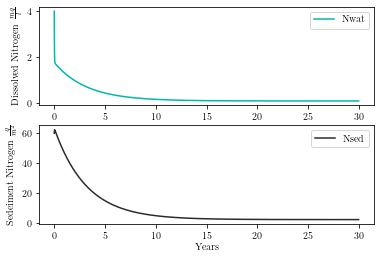

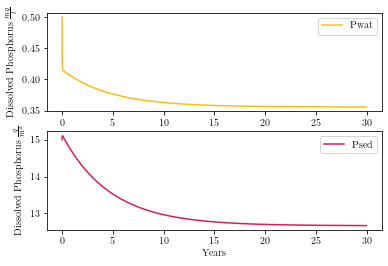

In [28]:
step = .04

for t in range(1,len(Nwat)):
	Nwat[t] = Nwat[t-1] + step*((Nrel/z)*Nsed[t-1] - (a/Wres)*Nwat[t-1] - (SedRate/z)*Nwat[t-1]+ (Nload- Denit)/z )
	Nsed[t] = Nsed[t-1] + step*(SedRate*(1-Nbound)*Nwat[t-1] - Nrel*Nsed[t-1])

	Pwat[t] = Pwat[t-1] + step*((Prel/z)*Psed[t-1] - (a/Wres)*Pwat[t-1] - (SedRate/z)*Pwat[t-1] + Pload/z)
	Psed[t] = Psed[t-1] + step*(SedRate*(1-Pbound)*Pwat[t-1] - Prel*Psed[t-1])
#	Psed[t] = Psed[t-1] + step*(-1*Prel*Psed[t-1] + SedRate*(1-Pbound)*Pwat[t-1])

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(1)

plt.subplot(211)
plt.plot(T, Nwat, color = '#00B8A9', label = 'Nwat')
plt.ylabel(r"Dissolved Nitrogen $\frac{mg}{l}$")
plt.legend()

plt.subplot(212)
plt.plot(T, Nsed, color = '#2A2B2B', label = 'Nsed')
plt.ylabel(r"Sedeiment Nitrogen $\frac{g}{m^2}$")
plt.legend()
plt.xlabel('Years')

plt.show()

plt.figure(2)
plt.subplot(211)
plt.plot(T,Pwat, color = '#FFBB11', label = 'Pwat')
plt.ylabel(r"Dissolved Phosphorus $\frac{mg}{l}$")
plt.legend()

plt.subplot(212)
plt.plot(T,Psed, color = '#D52054', label = 'Psed')
plt.ylabel(r"Dissolved Phosphorus $\frac{g}{m^2}$")
plt.xlabel('Years')
plt.legend()

plt.show()


## Using delta t = 0.06
This is where we start to see instabilities forming although it is not as serious than when delta t = 0.08 years.

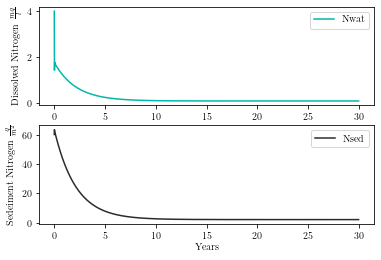

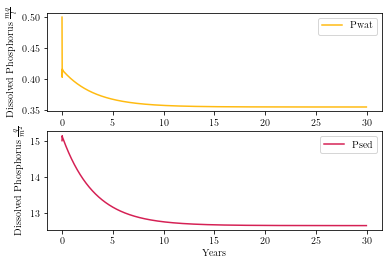

In [29]:
step = .06

for t in range(1,len(Nwat)):
	Nwat[t] = Nwat[t-1] + step*((Nrel/z)*Nsed[t-1] - (a/Wres)*Nwat[t-1] - (SedRate/z)*Nwat[t-1]+ (Nload- Denit)/z )
	Nsed[t] = Nsed[t-1] + step*(SedRate*(1-Nbound)*Nwat[t-1] - Nrel*Nsed[t-1])

	Pwat[t] = Pwat[t-1] + step*((Prel/z)*Psed[t-1] - (a/Wres)*Pwat[t-1] - (SedRate/z)*Pwat[t-1] + Pload/z)
	Psed[t] = Psed[t-1] + step*(SedRate*(1-Pbound)*Pwat[t-1] - Prel*Psed[t-1])
#	Psed[t] = Psed[t-1] + step*(-1*Prel*Psed[t-1] + SedRate*(1-Pbound)*Pwat[t-1])

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(1)

plt.subplot(211)
plt.plot(T, Nwat, color = '#00B8A9', label = 'Nwat')
plt.ylabel(r"Dissolved Nitrogen $\frac{mg}{l}$")
plt.legend()

plt.subplot(212)
plt.plot(T, Nsed, color = '#2A2B2B', label = 'Nsed')
plt.ylabel(r"Sedeiment Nitrogen $\frac{g}{m^2}$")
plt.legend()
plt.xlabel('Years')

plt.show()

plt.figure(2)
plt.subplot(211)
plt.plot(T,Pwat, color = '#FFBB11', label = 'Pwat')
plt.ylabel(r"Dissolved Phosphorus $\frac{mg}{l}$")
plt.legend()

plt.subplot(212)
plt.plot(T,Psed, color = '#D52054', label = 'Psed')
plt.ylabel(r"Dissolved Phosphorus $\frac{g}{m^2}$")
plt.xlabel('Years')
plt.legend()

plt.show()
